In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [34]:
precp=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019', '2020'],
   "PRCP":[24.62, 19.19, 20.59, 16.45, 21.32, 14.16]})
firect=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019', '2020'],
                     "Fires":[602, 954, 794, 1196, 802, 1078]})
fireacre=pd.DataFrame({"Year":['2015', '2016', '2017', '2018', '2019', '2020'],
                     "Fires":[10177.700, 110153.095, 67968.940, 495431.910, 38173.540, 625356]})

In [35]:
firecombo=pd.merge(firect, fireacre, on='Year')
fireprcp=pd.merge(firecombo, precp, on ='Year')
fireprcp=fireprcp.rename(columns={"Fires_x":"FireCount", 'Fires_y': 'FireAcres'})
fireprcp

,Year,FireCount,FireAcres,PRCP
0,2015,602,10177.700,24.62
1,2016,954,110153.095,19.19
2,2017,794,67968.940,20.59
3,2018,1196,495431.910,16.45
4,2019,802,38173.540,21.32
5,2020,1078,625356.000,14.16


In [36]:
critical_value=stats.chi2.ppf(q=0.95, df=4)
critical_value

9.487729036781154

In [37]:
# Run the chi square test with stats.chisquare()
stats.chisquare(fireprcp['FireCount'], fireprcp['PRCP'])

Power_divergenceResult(statistic=281221.86374283064, pvalue=0.0)

In [38]:
# Run the chi square test with stats.chisquare()
stats.chisquare(fireprcp['FireAcres'], fireprcp['PRCP'])

Power_divergenceResult(statistic=43465614139.5517, pvalue=0.0)

In [39]:
# Run the chi square test with stats.chisquare()
stats.chisquare(fireprcp['FireCount'], fireprcp['FireAcres'])

Power_divergenceResult(statistic=1336483.9252470944, pvalue=0.0)

Text(0.5, 1.0, 'Number of Annual Precip by Year in Colorado')

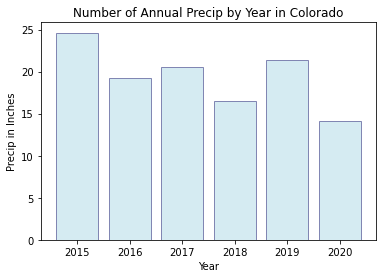

In [40]:
x_axis=fireprcp['Year']
y_axis=fireprcp['PRCP']
plt.bar(x_axis, y_axis, color='lightblue', edgecolor='midnightblue', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Precip in Inches')
plt.title('Number of Annual Precip by Year in Colorado')



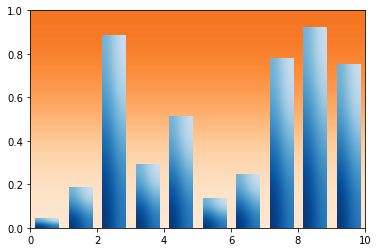

In [51]:
x=fireprcp['Year']
y=fireprcp['FireCount']

def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_image(ax, direction=0, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.Oranges, cmap_range=(0.1, 0.6))

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
ax.set_aspect('auto')
plt.show()

Text(0.5, 1.0, 'Number of Annual Precip by Year in Colorado')

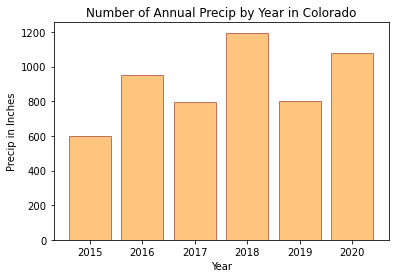

In [41]:
x_axis=fireprcp['Year']
y_axis=fireprcp['FireCount']
plt.bar(x_axis, y_axis, color='darkorange', edgecolor='darkred', alpha=0.5, align='center')
plt.xlabel('Year')
plt.ylabel('Precip in Inches')
plt.title('Number of Annual Precip by Year in Colorado')

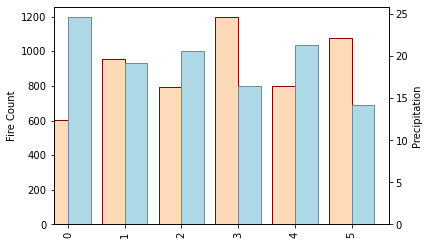

In [50]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
width=0.4
fireprcp.FireCount.plot(kind='bar', color='peachpuff', edgecolor='darkred', ax=ax, width=width, position=1)
fireprcp.PRCP.plot(kind='bar', color='lightblue', edgecolor='lightslategray', ax=ax2, width=width, position=0)

ax.set_ylabel('Fire Count')
ax2.set_ylabel('Precipitation')

plt.show()

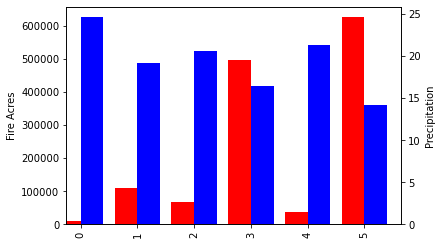

In [43]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax2=ax.twinx()
width=0.4
fireprcp.FireAcres.plot(kind='bar', color='red', ax=ax, width=width, position=1)
fireprcp.PRCP.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Fire Acres')
ax2.set_ylabel('Precipitation')

plt.show()

In [23]:
# # Histogram Plot of Da
# plt.subplot(2, 1, 2)
# plt.hist(precp, 10, density=True, alpha=0.7, label="precipitation")
# plt.hist(firect, 10, density=True, alpha=0.7, label="firect")
# plt.axvline(precp.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.axvline(fireact.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.legend()  
    
# return precp, firect